# Yearly Mean Total Sunspot Number

### Time Range  
**1700–2024** (last elapsed year)

---

### Data Description

The **yearly mean total sunspot number** is calculated as the arithmetic mean of daily total sunspot numbers across all days in a given year.

> **Note:** In early years—particularly before **1749**—the yearly means are based on only a fraction of the days due to missing observations.

- A value of `-1` indicates **missing data** (i.e., no observation available).

---

### Error Values

The **yearly standard deviation** is derived from daily values using the same formula applied to monthly means:

$$
\sigma(m) = \sqrt{\frac{\sum N(d) \cdot \sigma(d)^2}{\sum N(d)}}
$$

Where:

- $\sigma(d)$ is the standard deviation for a single day  
- $N(d)$ is the number of observations for that day

---

### Standard Error on Yearly Mean

The **standard error** of the yearly mean is computed as:

$$
\text{Standard Error} = \frac{\sigma}{\sqrt{N}}
$$

Where:

- $\sigma$ is the yearly standard deviation  
- $N$ is the total number of daily observations in the year

> **Note:** This standard error reflects **precision**—how sensitive the yearly mean is to random errors in daily values.  
> The **absolute accuracy** (uncertainty on the mean) is assessed over longer time scales and is **not provided** for individual years.

### Data Source Attribution

Sunspot data used in this analysis is provided by the **World Data Center SILSO**, Royal Observatory of Belgium, Brussels.

**DOI:** [10.4414/qnza-ac80  
**Website:** https://www.sidc.be/SILSO/infosnytot  
**License:** Creative Commons BY-NC 4.0 (Non-commercial use with attribution)

> Clette, F. & Lefèvre, L. (2015). *SILSO Sunspot Number V2.0*. Published by WDC SILSO - Royal Observatory of Belgium.


## Read the Downloaded CSV File into a Pandas Dataframe

In [4]:
import pandas as pd # Import the pandas library for data manipulation

# Reference for file format: https://www.sidc.be/SILSO/infosnmtot


# The CSV file SN_y_tot_V2.0.csv contains the following columns:
# Column 1: Gregorian calendar year (mid-year date).
# Column 2: Yearly mean total sunspot number.
# Column 3: Yearly mean standard deviation of the input sunspot numbers from individual stations.
# Column 4: Number of observations used to compute the yearly mean total sunspot number.
# Column 5: Definitive/provisional marker. A blank indicates that the value is definitive. 
#           1' indicates that the value is definitive. '0' indicates that the value is still provisional.

# Define expected data types for each column to ensure correct parsing
dtype_spec = {
    "Year": float,                              # Year as a float (e.g., 2020.5)
    "YearlyMeanTotalSunspotNumber": float,      # Average sunspot number for the year
    "YearlyMeanStdDev": float,                  # Standard deviation of sunspot numbers
    "NumObservations": int,                     # Number of observations used
    "DefinitiveMarker": int                     # Marker indicating if data is provisional
}

# Load the CSV file:
# - Use semicolon as delimiter
# - No header row in the file, so manually assign column names
# - Apply the defined data types for consistency
YearlySSN = pd.read_csv(
            'SN_y_tot_V2.0.csv',
             delimiter=';',
             header=None,
             names=list(dtype_spec.keys()),
             dtype=dtype_spec
)

In [5]:
# Convert the 'Year' column to a datetime object (removing any fractional part)
# This ensures compatibility with time series operations and plotting
YearlySSN["Date"] = pd.to_datetime(YearlySSN["Year"].astype(int), format='%Y')

# Set the newly created 'Date' column as the DataFrame index
# This is useful for time-based indexing and analysis
YearlySSN.set_index("Date", inplace=True)

# Sort the DataFrame by the datetime index to ensure chronological order
YearlySSN.sort_index(inplace=True)

# Create a formatted string version of the date for use in Excel or Tableau
# Format: 'DD/MM/YYYY' (e.g., '01/01/2020')
YearlySSN["Date_str"] = YearlySSN.index.strftime("%d/%m/%Y")

## Data Quality Checking

In [7]:
# 1. Check for null values
print("Null values per column:")
print(YearlySSN.isnull().sum())

# 2. Check data types
print("\nData types:")
print(YearlySSN.dtypes)

# 3. Check for duplicate rows
print("\nNumber of duplicate rows:")
print(YearlySSN.duplicated().sum())

# 4. Check for missing data
print("\nMissing sunspot numbers:")
print((YearlySSN["YearlyMeanTotalSunspotNumber"] == -1).sum())

print("\nMissing observation counts:")
print((YearlySSN["NumObservations"] == -1).sum())

print("\nMissing standard deviation counts:")
print((YearlySSN["YearlyMeanStdDev"] == -1).sum())

# 5. Check for years outside expected range
year_min = YearlySSN['Year'].min()
year_max = YearlySSN['Year'].max()

print("\nYear range:")
print(f"{year_min} to {year_max}")

# 6. Check for provisional data
print("\nProvisional data counts:")
print((YearlySSN["DefinitiveMarker"] == 0).sum())


Null values per column:
Year                            0
YearlyMeanTotalSunspotNumber    0
YearlyMeanStdDev                0
NumObservations                 0
DefinitiveMarker                0
Date_str                        0
dtype: int64

Data types:
Year                            float64
YearlyMeanTotalSunspotNumber    float64
YearlyMeanStdDev                float64
NumObservations                   int32
DefinitiveMarker                  int32
Date_str                         object
dtype: object

Number of duplicate rows:
0

Missing sunspot numbers:
0

Missing observation counts:
118

Missing standard deviation counts:
118

Year range:
1700.5 to 2024.5

Provisional data counts:
0


In [8]:
# List the years which had missing numbers of observations
missing_obs = YearlySSN[YearlySSN["NumObservations"] == -1]
print(missing_obs[["Year", "NumObservations"]])

              Year  NumObservations
Date                               
1700-01-01  1700.5               -1
1701-01-01  1701.5               -1
1702-01-01  1702.5               -1
1703-01-01  1703.5               -1
1704-01-01  1704.5               -1
...            ...              ...
1813-01-01  1813.5               -1
1814-01-01  1814.5               -1
1815-01-01  1815.5               -1
1816-01-01  1816.5               -1
1817-01-01  1817.5               -1

[118 rows x 2 columns]


## Why Sunspot Numbers Exist but the Number of Observations Is Missing (1700–1817)

The SILSO dataset includes annual sunspot numbers from the year 1700 onwards. However, for the period 1700 to 1817, the column indicating the **number of observations** is marked as `-1`, which signifies missing or unavailable data. This discrepancy arises from the nature of historical record-keeping and the methods used to reconstruct early solar activity.

### Sunspot Numbers: Reconstructed from Historical Records

Although systematic solar observations began in the early 17th century, they were conducted by individual astronomers using varied instruments and methods. These records include:

- Drawings and logs by observers such as Staudacher and Schwabe.
- Written descriptions in scientific publications and personal correspondence.
- Compilations by researchers like Hoyt and Schatten, who developed the Group Sunspot Number series.

These historical sources allowed researchers to estimate sunspot numbers retrospectively. The SILSO team later calibrated and integrated these reconstructions into the modern **International Sunspot Number Version 2.0**, released in 2015.

### Missing Observation Counts: Lack of Standardised Metadata

During the 18th and early 19th centuries, there was no centralised or standardised system for recording solar observations. As a result:

- The **exact number of daily or monthly observations** contributing to each annual sunspot number is often unknown.
- Many original records were incomplete, informal, or have been lost over time.
- The SILSO dataset uses `-1` as a placeholder to indicate that this metadata is missing.

This absence does not affect the availability of sunspot numbers themselves, which are derived from the best available historical evidence.

### Reference

Clette, F., Lefèvre, L., Cagnotti, M., Cortesi, S. and Bulling, A., 2016. *The revised sunspot number: assembling all corrections*. Solar Physics, 291(9-10), pp.2629–2651.


In [10]:
# List the years which had missing standard deviation
missing_std = YearlySSN[YearlySSN["YearlyMeanStdDev"] == -1]
print(missing_std[["Year", "YearlyMeanStdDev"]])

              Year  YearlyMeanStdDev
Date                                
1700-01-01  1700.5              -1.0
1701-01-01  1701.5              -1.0
1702-01-01  1702.5              -1.0
1703-01-01  1703.5              -1.0
1704-01-01  1704.5              -1.0
...            ...               ...
1813-01-01  1813.5              -1.0
1814-01-01  1814.5              -1.0
1815-01-01  1815.5              -1.0
1816-01-01  1816.5              -1.0
1817-01-01  1817.5              -1.0

[118 rows x 2 columns]


This is the same range as the missing number of observations

## Calculate Confidence Intervals for Sunspot Data 

In [13]:
import numpy as np

# Create a copy to avoid modifying the original DataFrame directly
YearlySSN = YearlySSN.copy()

# Initialise new columns with zeros
YearlySSN["StandardError"] = np.nan
YearlySSN["LowerBound"] = np.nan
YearlySSN["UpperBound"] = np.nan

# Define a mask for valid rows where StdDev is not -1 and Sunspot Number is positive
valid_mask = (
    (YearlySSN["YearlyMeanTotalSunspotNumber"] > 0) &
    (YearlySSN["YearlyMeanStdDev"] != -1)
)

# Compute standard error for valid rows
YearlySSN.loc[valid_mask, "StandardError"] = (
    YearlySSN.loc[valid_mask, "YearlyMeanStdDev"] /
    np.sqrt(YearlySSN.loc[valid_mask, "YearlyMeanTotalSunspotNumber"])
)

# Compute 95% confidence intervals (±1.96 * SE)
YearlySSN.loc[valid_mask, "LowerBound"] = (
    YearlySSN.loc[valid_mask, "YearlyMeanTotalSunspotNumber"] -
    1.96 * YearlySSN.loc[valid_mask, "StandardError"]
)
YearlySSN.loc[valid_mask, "UpperBound"] = (
    YearlySSN.loc[valid_mask, "YearlyMeanTotalSunspotNumber"] +
    1.96 * YearlySSN.loc[valid_mask, "StandardError"]
)

# For invalid rows (StdDev = -1), bounds and SE remain 0.0 as initialized


## Plot Sunspot Data with Confidence Intervals

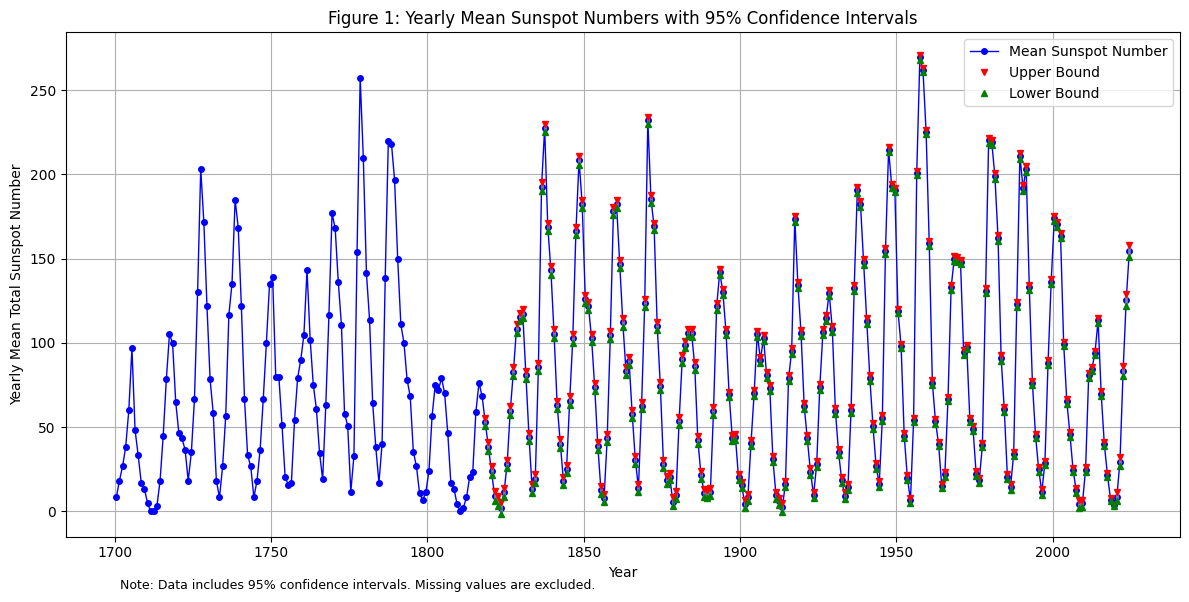

In [15]:
import matplotlib.pyplot as plt

# Extract data
years = YearlySSN["Year"]
means = YearlySSN["YearlyMeanTotalSunspotNumber"]
lower_bounds = YearlySSN["LowerBound"]
upper_bounds = YearlySSN["UpperBound"]

# Create the plot
plt.figure(figsize=(12, 6))

# Plot the mean as a line with dots
plt.plot(years, means, 'o-', label='Mean Sunspot Number', color='blue', linewidth=1, markersize=4)

# Draw vertical drop bars from lower to upper bound
for x, low, high in zip(years, lower_bounds, upper_bounds):
    if not (pd.isna(low) or pd.isna(high)):
        plt.plot([x, x], [low, high], color='grey', linewidth=2)

# Optionally plot markers at the bounds
plt.plot(years, upper_bounds, 'v', label='Upper Bound', color='red', markersize=4)
plt.plot(years, lower_bounds, '^', label='Lower Bound', color='green', markersize=4)

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Yearly Mean Total Sunspot Number")
plt.title("Figure 1: Yearly Mean Sunspot Numbers with 95% Confidence Intervals")
plt.figtext(0.5, 0.01, "Note: Data includes 95% confidence intervals. Missing values are excluded.",
            wrap=True, horizontalalignment='right', fontsize=9)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


The 95% confidence intervals for the yearly mean sunspot numbers are relatively narrow in comparison to the magnitude of the means themselves. This indicates a high degree of precision in the estimates, with limited statistical uncertainty. In most years, the range between the lower and upper bounds is small, suggesting that the observed variations in sunspot activity are robust and not significantly influenced by sampling error or measurement variability.

The approximate 11 year cycle can be seen clearly, as can the Dalton minimum - an extended period of reduced sunspot numbers betwween roughly 1790 and 1830.


## Initial Plotting and Checking for Stationarity

### Test-train Split

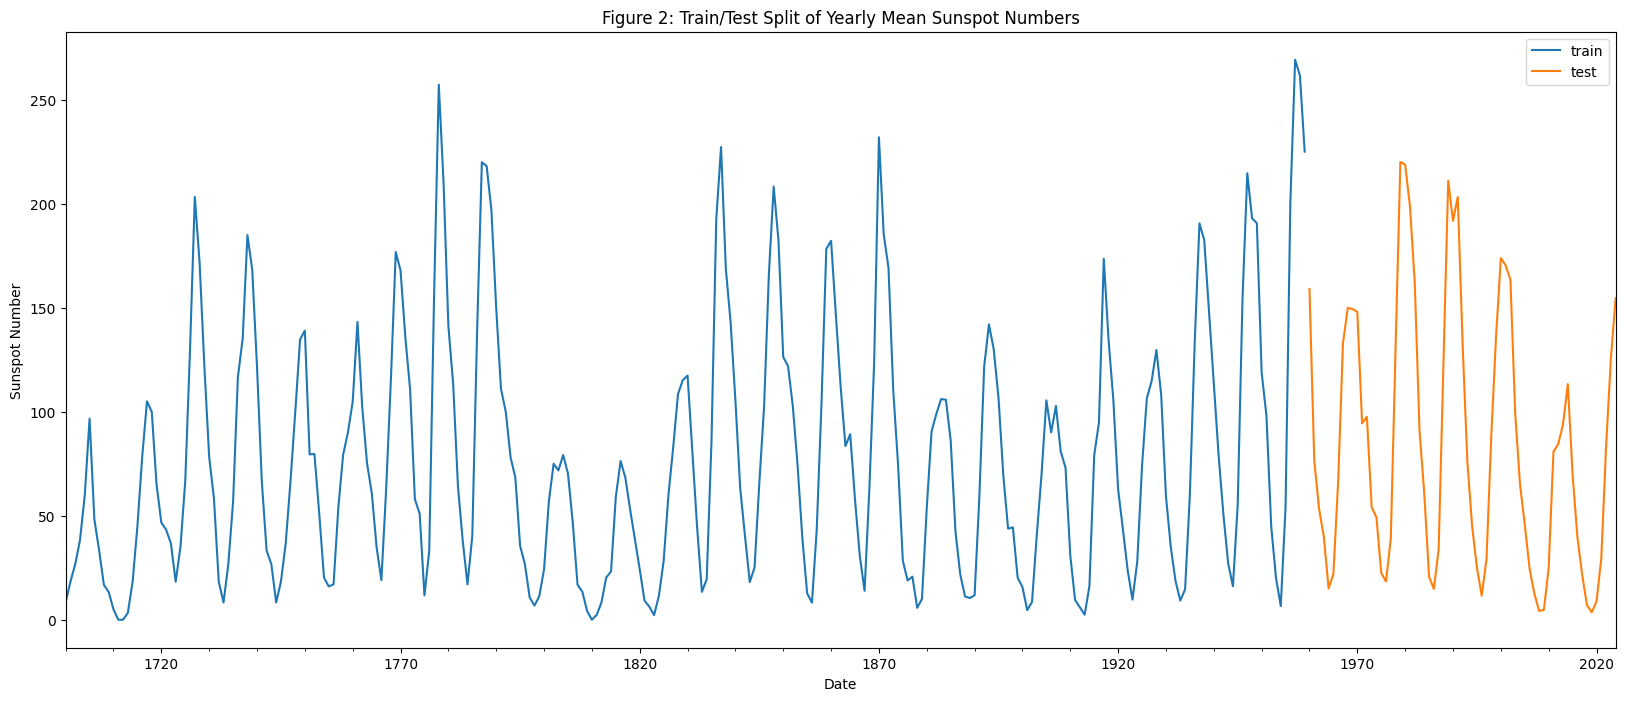

In [19]:
# Calculate the total number of data points in the dataset
total_points = len(YearlySSN)

# Define the training set size as 80% of the total data
train_size = int(0.8 * total_points)

# Split the dataset into training and test sets using index slicing
train = YearlySSN.iloc[0:train_size].copy()   # First 80% for training
test = YearlySSN.iloc[train_size:].copy()     # Remaining 20% for testing

# Create a plot to visualise the train/test split
fig, ax = plt.subplots(figsize=(20, 8))  # Set a wide figure size for clarity

# Add axis labels and a title
ax.set_title("Figure 2: Train/Test Split of Yearly Mean Sunspot Numbers")
ax.set_xlabel("Year")
ax.set_ylabel("Sunspot Number")

# Plot the training data
train['YearlyMeanTotalSunspotNumber'].plot(ax=ax, label='train')

# Plot the test data
test['YearlyMeanTotalSunspotNumber'].plot(ax=ax, label='test')

# Add a legend to distinguish between train and test sets
plt.legend()

# Display the plot
plt.show()

### Stationarity and the Augmented Dickey-Fuller (ADF) Test

#### What is Stationarity?

Stationarity is a fundamental concept in time series analysis. A stationary time series has statistical properties—such as mean, variance, and autocorrelation—that do not change over time. Ensuring stationarity is essential for reliable forecasting using models such as ARIMA or SARIMA.

Key indicators of non-stationarity include:

- **Trend**: A long-term upward or downward movement in the data.
- **Seasonality**: A repeating pattern at regular intervals (e.g. annually, monthly).
- **Changing autocorrelation**: Relationships between observations that vary over time.

---

### The Augmented Dickey-Fuller (ADF) Test

The ADF test is a statistical method used to determine whether a time series is stationary by testing for the presence of a unit root.

#### Hypotheses:
- **Null hypothesis (H₀)**: The time series has a unit root → non-stationary
- **Alternative hypothesis (H₁)**: The time series does not have a unit root → stationary

#### Interpreting the p-value:
- **p-value < 0.05**: Reject H₀ → The series is stationary
- **p-value ≥ 0.05**: Fail to reject H₀ → The series is not stationary

This test is particularly useful for natural phenomena such as sunspot cycles, which often exhibit long-term trends or periodic behaviour.

**Reference**: Selva Prabhakaran (n.d.) Augmented Dickey Fuller Test (ADF Test) – Must Read Guide. Machine Learning Plus. Available at: https://www.machinelearningplus.com/time-series/augmented-dickey-fuller-test/ (Accessed: 23 August 2025).


In [21]:
from statsmodels.tsa.stattools import adfuller  # Import the ADF test function

# Run the Augmented Dickey-Fuller test on the sunspot time series
result = adfuller(train['YearlyMeanTotalSunspotNumber'])

# Print the p-value from the test result
print('p-value: ' + str(result[1]))

# Interpret the p-value to determine stationarity
if result[1] < 0.05:
    # If p-value is less than 0.05, reject the null hypothesis (data is stationary)
    print('We reject the null hypothesis. The data is stationary')
else:
    # If p-value is greater than or equal to 0.05, fail to reject the null (data is not stationary)
    print('We fail to reject the null hypothesis. The data is not stationary')

p-value: 0.09870194691014061
We fail to reject the null hypothesis. The data is not stationary


In [22]:
from statsmodels.tsa.stattools import adfuller

# Apply seasonal differencing (assuming s = 11 for sunspot cycle)
train.loc[:, 'SeasonalDiff'] = train['YearlyMeanTotalSunspotNumber'].diff(11)

# Drop NaNs
seasonal_diff_series = train['SeasonalDiff'].dropna()

# Run ADF test
result = adfuller(seasonal_diff_series)

# Print results
print("p-value:", result[1])

# Interpretation
if result[1] < 0.05:
    print("We reject the null hypothesis. The seasonally differenced data is stationary.")
else:
    print("We fail to reject the null hypothesis. The seasonally differenced data is not stationary.")

p-value: 0.006595901085729924
We reject the null hypothesis. The seasonally differenced data is stationary.


Mean of seasonally differenced data: 4.520883534136546


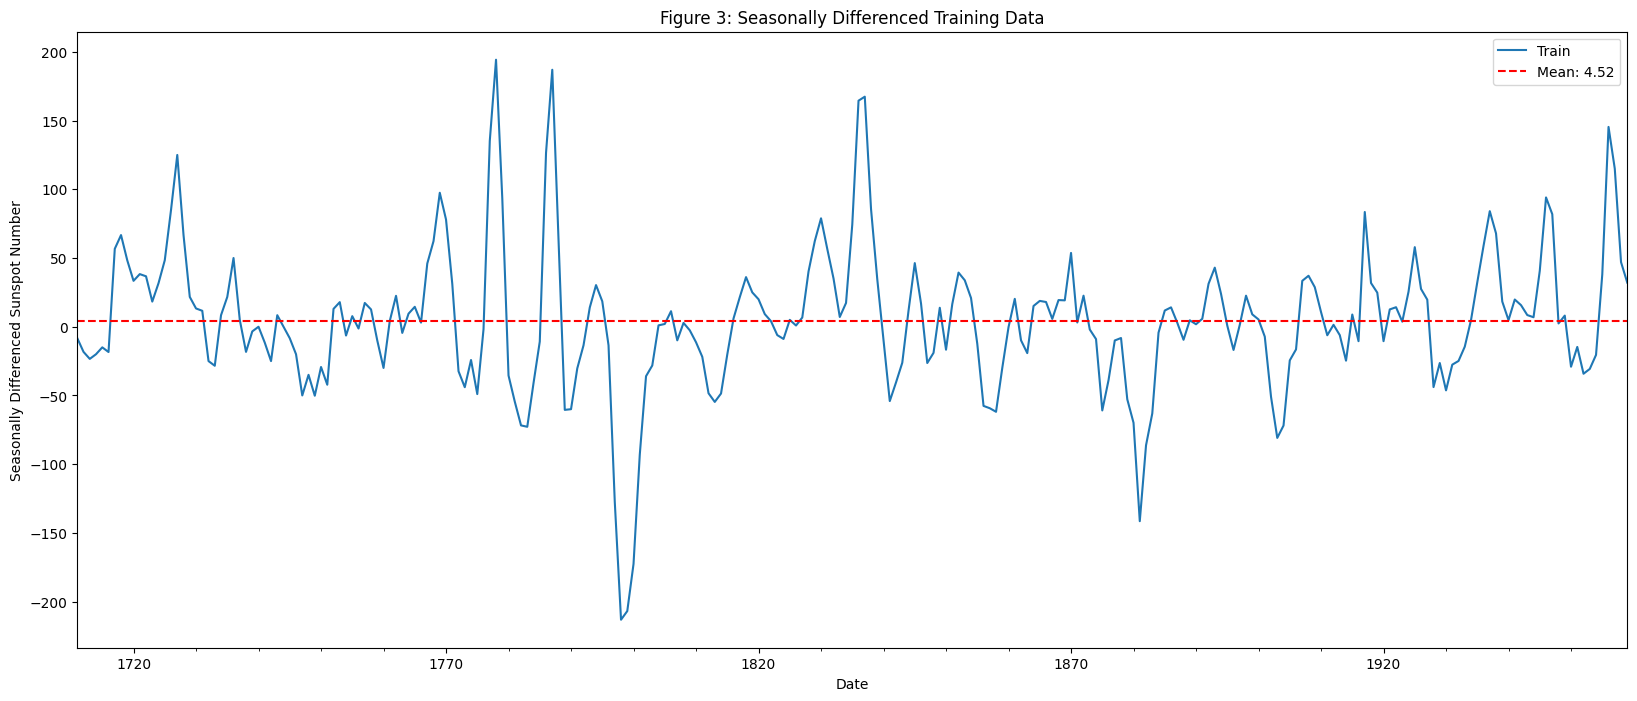

In [23]:
import matplotlib.pyplot as plt

# Drop NaNs from the seasonally differenced data
seasonal_diff_series = train['SeasonalDiff'].dropna()

# Calculate the mean
mean_seasonal_diff = seasonal_diff_series.mean()
print(f"Mean of seasonally differenced data: {mean_seasonal_diff}")

# Create a plot to visualise the seasonally differenced training data
fig, ax = plt.subplots(figsize=(20, 8))  # Set a wide figure size for clarity

# Add axis labels and a title
ax.set_title("Figure 3: Seasonally Differenced Training Data")
ax.set_xlabel("Year")
ax.set_ylabel("Seasonally Differenced Sunspot Number")

# Plot the training data
seasonal_diff_series.plot(ax=ax, label='Train')

# Add a horizontal line for the mean
ax.axhline(mean_seasonal_diff, color='red', linestyle='--', label=f'Mean: {mean_seasonal_diff:.2f}')

# Add legend
ax.legend()

# Display the plot
plt.show()

## Autocorrelation Plot

The autocorrelation plot above displays the correlation of the time series with its own past values (lags). Each vertical line represents the autocorrelation coefficient at a specific lag, with the shaded blue region indicating the 95% confidence interval.

- **Significant spikes** outside the blue region suggest strong autocorrelation at those lags.
- This is useful for identifying **seasonal patterns** or **repeating cycles**, such as the 11-year sunspot cycle.
- If many lags fall outside the confidence bounds, the series may not be white noise and could benefit from AR or MA components in modelling.

This plot helps inform the choice of parameters for ARIMA or SARIMA models.


<Figure size 800x500 with 0 Axes>

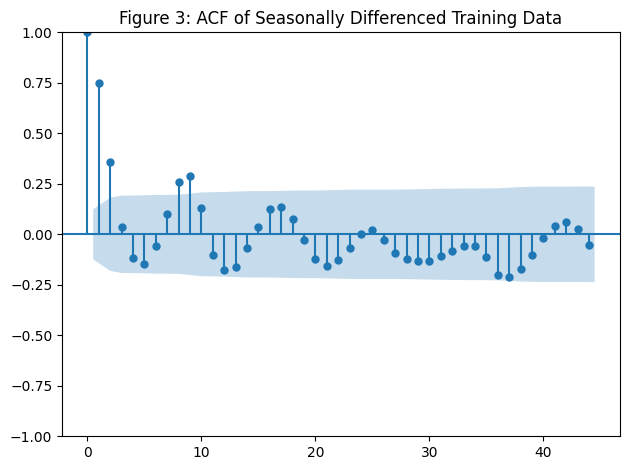

In [25]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Drop NaNs from the differenced series
diff_series = train['SeasonalDiff'].dropna()

# Plot ACF
plt.figure(figsize=(8, 5))
plot_acf(diff_series, lags=44)
plt.title('Figure 3: ACF of Seasonally Differenced Training Data')
plt.tight_layout()
plt.show()


The ACF shows no seasonal autocorrelation (e.g. significant spikes at lags 11, 22, 33 or 44)

## Partial Autocorrelation Function (PACF) Plot

The PACF plot above illustrates the partial autocorrelation of the time series at various lags, controlling for the influence of shorter lags. Each blue dot represents the strength of the direct relationship between the series and its lagged values, while the vertical lines and shaded region indicate the 95% confidence interval.

- **Significant spikes** outside the shaded area suggest that the corresponding lag has a statistically meaningful direct effect and may be a candidate for inclusion as an autoregressive (AR) term.
- This plot is particularly useful for identifying the appropriate number of AR terms in ARIMA or SARIMA models.

In the context of sunspot data, the PACF can help reveal underlying periodic behaviour and guide model selection for forecasting.


<Figure size 800x500 with 0 Axes>

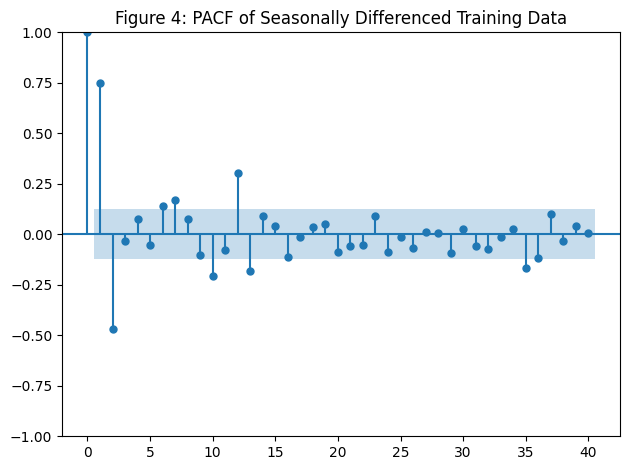

In [28]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf

# Drop NaNs from the differenced series
diff_series = train['SeasonalDiff'].dropna()

# Plot PACF
plt.figure(figsize=(8, 5))
plot_pacf(diff_series, lags=40)
plt.title('Figure 4: PACF of Seasonally Differenced Training Data')
plt.tight_layout()
plt.show()

The PACF shows no seasonal autocorrelation (e.g. significant spikes at lags 11, 22 or 33)

# Model selection

## The Role and Limitations of the Mean-Based Naïve Forecast

The mean-based naïve forecast assumes that future sunspot numbers will remain consistent with the historical average. While this method is not suitable for forecasting cyclical solar activity, it serves as a useful **benchmark** or **null model** against which more sophisticated approaches can be evaluated.

Its simplicity allows it to act as a baseline: if a forecasting model cannot outperform the mean-based forecast, it offers limited practical value. However, due to the following limitations, it is not appropriate for modelling sunspot behaviour:

- **Cyclical Nature Ignored**: Sunspot activity follows a well-established ~11-year cycle. The mean forecast disregards this periodicity, leading to inaccurate predictions.
- **Failure to Capture Seasonality**: Although the ADF test confirms that the data is stationary, the mean-based approach does not account for the strong seasonal and cyclical components inherent in solar activity.
- **Lack of Predictive Skill**: It cannot model the peaks, troughs, or transitions between solar cycles, which are critical for understanding and forecasting sunspot behavior.

As Hathaway (2015, §7.2) notes, the mean amplitude serves as a **benchmark for prediction methods**, but represents a **"prediction without any skill."** If other models cannot outperform this baseline, they offer little practical value.

**Conclusion**: The mean-based naive forecast is included solely as a reference point. Its poor performance highlights the value of more sophisticated models like **SARIMA**, which incorporate seasonality and autocorrelation to better reflect the underlying structure of the data.

**Reference**: Hathaway, D. H. (2015). The Solar Cycle. Living Reviews in Solar Physics, 12(1), 4. https://doi.org/10.1007/lrsp-2015-4

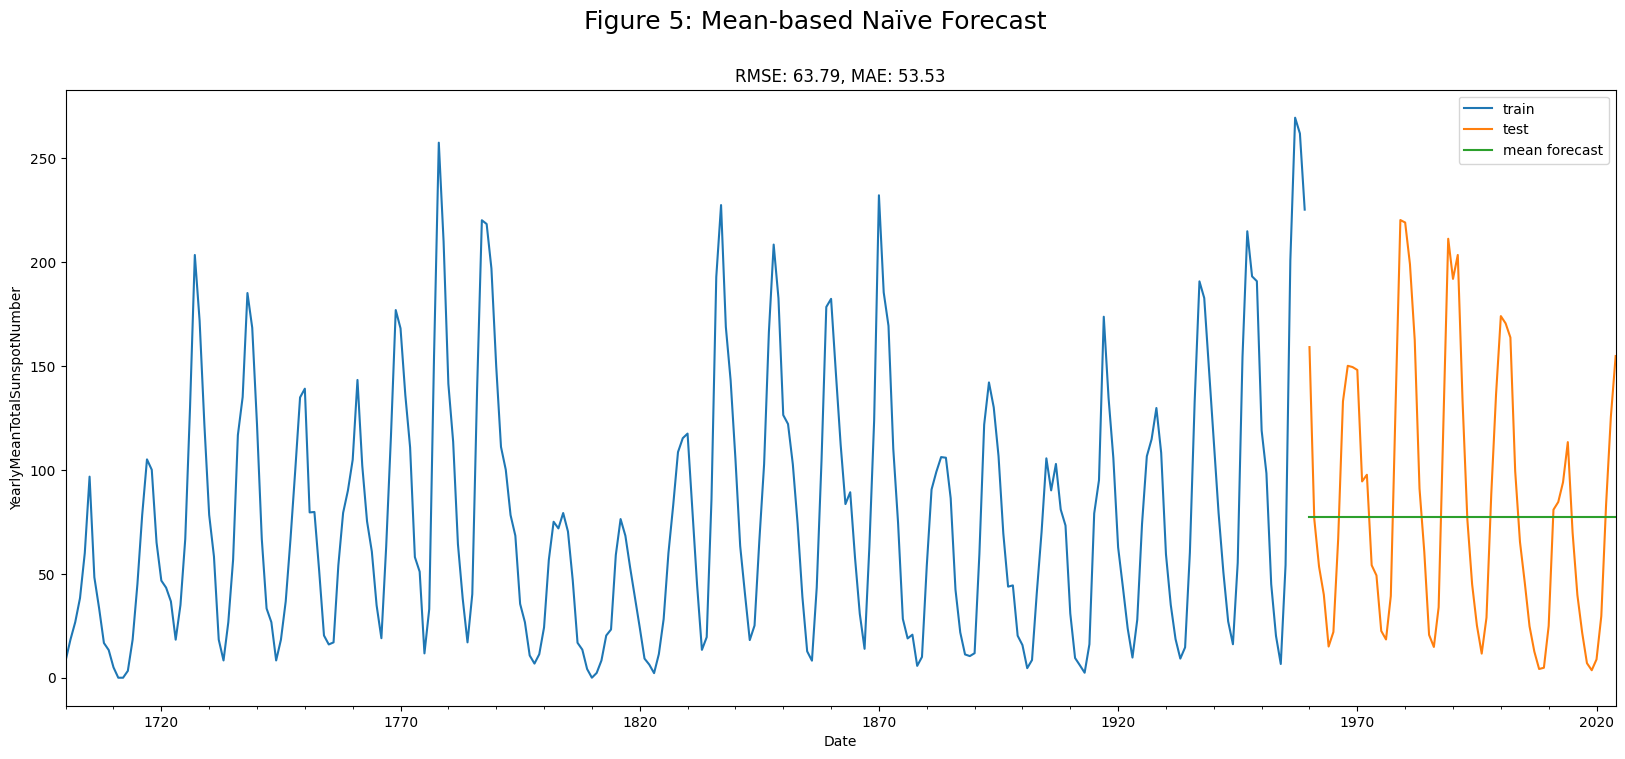

In [32]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate the mean of the training set
mean_value = train["YearlyMeanTotalSunspotNumber"].mean()

# Apply the mean forecast to the test set
test_mean = test.copy()
test_mean["predicted"] = mean_value  # Every prediction is the same: the training mean

# Calculate error metrics
rmse_mean = round(np.sqrt(mean_squared_error(test_mean["YearlyMeanTotalSunspotNumber"], test_mean["predicted"])), 2)

mae_mean = round(mean_absolute_error(test_mean["YearlyMeanTotalSunspotNumber"], test_mean["predicted"]), 2)

# Plot the actual vs predicted values
fig, ax = plt.subplots(figsize=(20, 8))

# Plot training data
train["YearlyMeanTotalSunspotNumber"].plot(ax=ax, label="train")

# Plot test data
test_mean["YearlyMeanTotalSunspotNumber"].plot(ax=ax, label="test")

# Plot mean forecast
test_mean["predicted"].plot(ax=ax, label="mean forecast")

# Add legend and titles
plt.legend()
plt.title(f"RMSE: {rmse_mean}, MAE: {mae_mean}")
plt.suptitle("Figure 5: Mean-based Naïve Forecast", fontsize=18)
plt.ylabel("YearlyMeanTotalSunspotNumber")
plt.show()

## Why Holt-Winters Exponential Smoothing Is Not Suitable for Sunspot Data

### Limitations of Holt-Winters

1. **Strong Autocorrelation**  
   The raw sunspot data exhibits significant autocorrelation across multiple lags, particularly around the 11-year cycle. Holt-Winters assumes residuals are uncorrelated, making it unsuitable for data with long memory or autocorrelated errors.

2. **Irregular Cycles**  
   Sunspot activity follows a quasi-periodic cycle — not strictly additive or multiplicative. Holt-Winters performs best with stable, regular seasonal patterns, which this data does not exhibit.

3. **Underfitting Risk**  
   Holt-Winters lacks autoregressive and moving average components, which can lead to underfitting. This results in poor forecasts and residuals that still contain structure.

4. **SARIMA is More Appropriate**  
   SARIMA explicitly models autocorrelation and seasonality, making it better suited for time series such as sunspots that exhibit cyclical behaviour and correlated errors.

---

### Conclusion

Holt-Winters is not recommended for forecasting sunspot data due to its inability to handle autocorrelation and irregular cycles. SARIMA provides a more robust framework for capturing the underlying structure of the data.
cture of the data.

### Reference

Hyndman, R.J. and Athanasopoulos, G. (2021) *Forecasting: Principles and Practice*. 3rd edn. OTexts. Available at: [https://www.statlearning.com/](https://www.statlearning.com/) (Accessed: 23 August 2025).

> Exponential smoothing methods do not attempt to model the autocorrelations in the data. They are best suited to short-term forecasting where autocorrelation is not a major concern.

## Seasonal Autoregressive Integrated Moving Average (SARIMA)

### Introduction to ARIMA

ARIMA (Autoregressive Integrated Moving Average) is a popular model for forecasting time series data. It combines:
- **Autoregression (AR)**: Uses past values to predict future ones.
- **Integration (I)**: Applies differencing to make the series stationary.
- **Moving Average (MA)**: Models the relationship between an observation and past forecast errors.

ARIMA is suitable for data with trends but **not** for data with seasonal patterns.

---

### Why SARIMA?

SARIMA extends ARIMA by incorporating seasonal components, making it suitable for time series data that exhibit regular cycles. It models the next value in the sequence based on:
- Differenced observations
- Error terms
- Seasonal differences

In this case, the sunspot data **did exhibit seasonality**, so ARIMA was not appropriate. SARIMA was chosen to account for the 11-year cycle observed in the data.

---

### Advantages of SARIMA

- Effective at identifying patterns in time series data based on differences in observations  
- Accounts for seasonality in the data  

---

### SARIMA Parameters

SARIMA requires two sets of parameters:

- **ARIMA order**: `(p, d, q)`
  - `p`: Number of autoregressive terms
  - `d`: Number of non-seasonal differences
  - `q`: Number of moving average terms

- **Seasonal order**: `(P, D, Q, M)`
  - `P`: Seasonal autoregressive order
  - `D`: Number of seasonal differences
  - `Q`: Seasonal moving average order
  - `M`: Number of observations per season (e.g. 11 for yearly sunspot data with an 11-year cycle)

Together, these parameters allow SARIMA to model both short-term and seasonal patterns in the data.

---


### Using **pmdarima** for Auto-SARIMA Model Selection

The **pmdarima** library is a Python package designed to simplify and automate the process of building ARIMA and SARIMA models for time series forecasting. It’s especially useful for users who want to apply statistical forecasting methods without manually tuning all the parameters.


### Reference

Alkaline-ML (2023) *pmdarima: ARIMA estimators for Python*. Version 2.0.4. PyPI. Available at: [https://pypi.org/project/pmdarima/](https://pypi.org/project/pmdarima/) (Accessed: 23 August 2025).


In [36]:
import pmdarima as pm

# Use auto_arima to automatically identify the best SARIMA model parameters for the training data

arima_model = pm.auto_arima(
    train['YearlyMeanTotalSunspotNumber'],      # The time series data to model
    start_p=2, start_q=2,                       # Starting values for AR (p) and MA (q) terms - default values
    max_p=5, max_q=5,                           # Maximum values for AR and MA terms to search - default values
    start_P=1, start_Q=1,                       # Starting values for seasonal AR (P) and MA (Q) - default values
    max_P=2, max_Q=2,                           # Maximum values for seasonal AR and MA terms - default values
    d=0, D=1,                                   # Fixed differencing orders based on ADF test - one order of seasonal differencing
    stepwise=True,                              # Use stepwise search to reduce computation time
    seasonal=True,                              # Enable seasonal modelling
    m=11,                                       # Seasonal period (11 years for sunspot cycle)
    trace=True,                                 # Print progress and model selection steps
    error_action='ignore',                      # Silently skip models that fail to fit
    suppress_warnings=True,                     # Suppress convergence warnings
    trend='c',                                  # Constant term (included as d=0 and mean ≠ 0)
)

# Assign rounded AIC of best model to a variable to display
aic_sarima_auto = round(arima_model.aic(),2)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[11] intercept   : AIC=inf, Time=1.16 sec
 ARIMA(0,0,0)(0,1,0)[11] intercept   : AIC=2679.151, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[11] intercept   : AIC=2452.774, Time=0.24 sec
 ARIMA(0,0,1)(0,1,1)[11] intercept   : AIC=2494.684, Time=0.26 sec
 ARIMA(0,0,0)(0,1,0)[11]             : AIC=2679.151, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[11] intercept   : AIC=2474.653, Time=0.08 sec
 ARIMA(1,0,0)(2,1,0)[11] intercept   : AIC=2445.279, Time=0.61 sec
 ARIMA(1,0,0)(2,1,1)[11] intercept   : AIC=inf, Time=1.66 sec
 ARIMA(1,0,0)(1,1,1)[11] intercept   : AIC=inf, Time=0.67 sec
 ARIMA(0,0,0)(2,1,0)[11] intercept   : AIC=2674.783, Time=0.64 sec
 ARIMA(2,0,0)(2,1,0)[11] intercept   : AIC=2375.234, Time=0.80 sec
 ARIMA(2,0,0)(1,1,0)[11] intercept   : AIC=2381.797, Time=0.37 sec
 ARIMA(2,0,0)(2,1,1)[11] intercept   : AIC=inf, Time=1.95 sec
 ARIMA(2,0,0)(1,1,1)[11] intercept   : AIC=inf, Time=0.82 sec
 ARIMA(3,0,0)(2,1,0)[11] intercept   : AIC=2

In [37]:
# Ensure the training data has a consistent frequency (e.g., yearly)
train = train.asfreq(train.index.inferred_freq)

from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Fit a SARIMA model with parameters from pmdarima
# order=(2,0,0): AR(2), no differencing, MA(0)
# seasonal_order=(2,1,0,11): seasonal AR(2), first-order seasonal differencing, seasonal MA(0), seasonality of 11 years
sarima_auto = SARIMAX(
    train['YearlyMeanTotalSunspotNumber'],
    order=(2, 0, 0),
    seasonal_order=(2, 1, 0, 11)
).fit(maxiter=1000, disp=True)

# Check if the model successfully converged
if not sarima_auto.mle_retvals['converged']:
    print("Convergence failed. Adjust parameters or data.")
else:
    print("Convergence successful!")
    
# Create a copy of the test set for SARIMA predictions
test_sarima_auto = test.copy()

# Generate predictions using the SARIMA model
# 'start' and 'end' define the forecast range based on the test set's index
test_sarima_auto['predicted'] = sarima_auto.predict(start=test_sarima_auto.index[0], end=test_sarima_auto.index[-1])

# Calculate error metrics and round to 2 decimal places
# RMSE is Root Mean Squared Error
# MAE is Mean Absolute Error
rmse_sarima_auto = round(np.sqrt(mean_squared_error(test_sarima_auto['YearlyMeanTotalSunspotNumber'], test_sarima_auto['predicted'])), 2)
mae_sarima_auto = round(mean_absolute_error(test_sarima_auto['YearlyMeanTotalSunspotNumber'], test_sarima_auto['predicted']), 2)

# print(f'RMSE (Auto): {rmse_sarima_auto}, MAE (Auto): {mae_sarima_auto}')

Convergence successful!


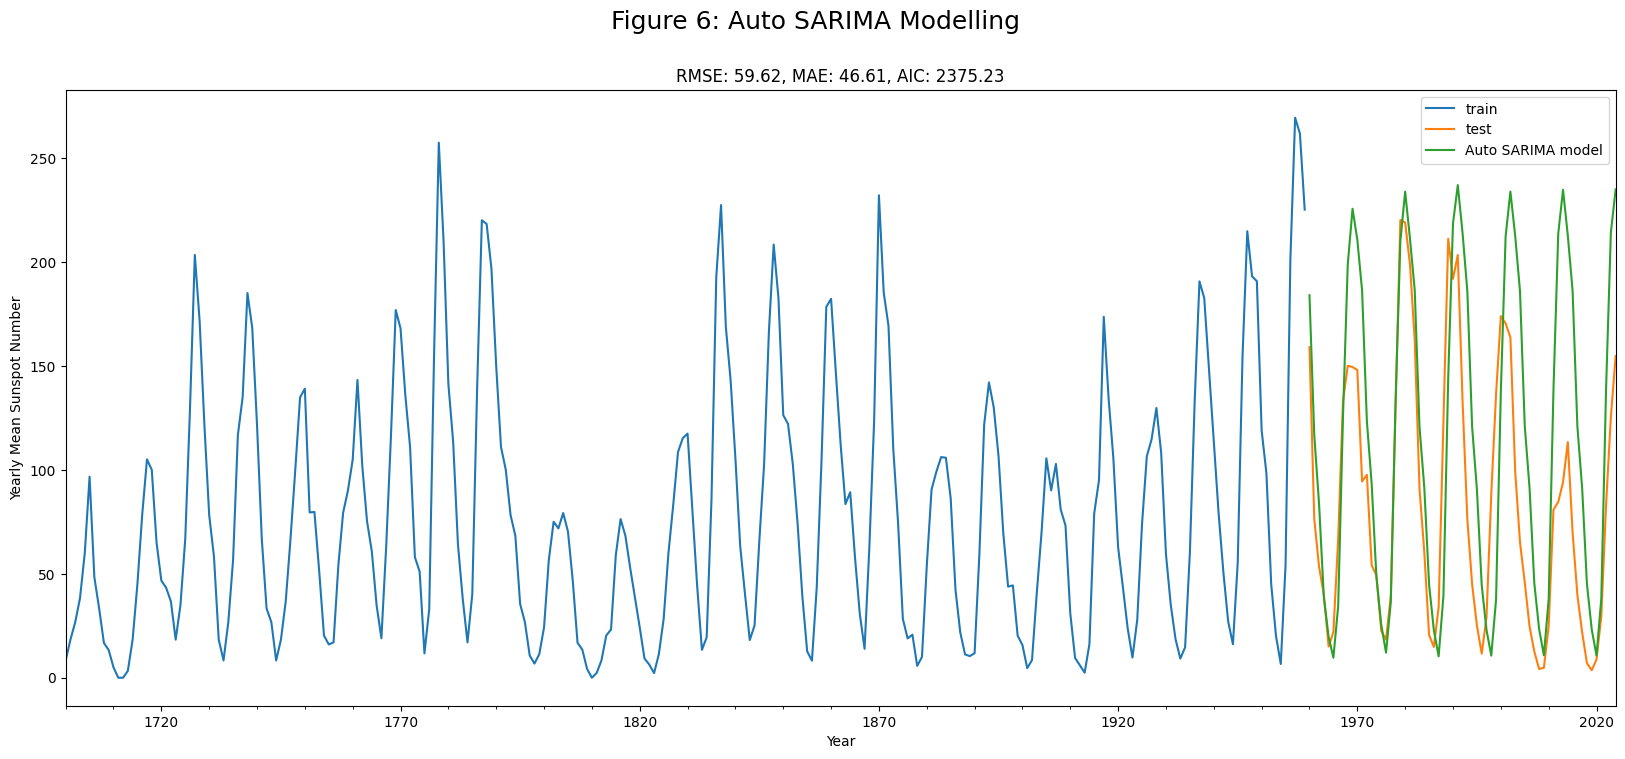

In [38]:
# Plot actual vs predicted values
fig, ax = plt.subplots(figsize=(20, 8))

# Plot training data
train['YearlyMeanTotalSunspotNumber'].plot(ax=ax, label='train')

# Plot test data
test_sarima_auto['YearlyMeanTotalSunspotNumber'].plot(ax=ax, label='test')

# Plot SARIMA forecast
test_sarima_auto['predicted'].plot(ax=ax, label='Auto SARIMA model')

# Add legend and titles
plt.legend()
plt.title(f'RMSE: {rmse_sarima_auto}, MAE: {mae_sarima_auto}, AIC: {aic_sarima_auto}')
plt.suptitle("Figure 6: Auto SARIMA Modelling", fontsize=18)
plt.xlabel('Year')
plt.ylabel('Yearly Mean Sunspot Number')
plt.show()

# Check Residuals

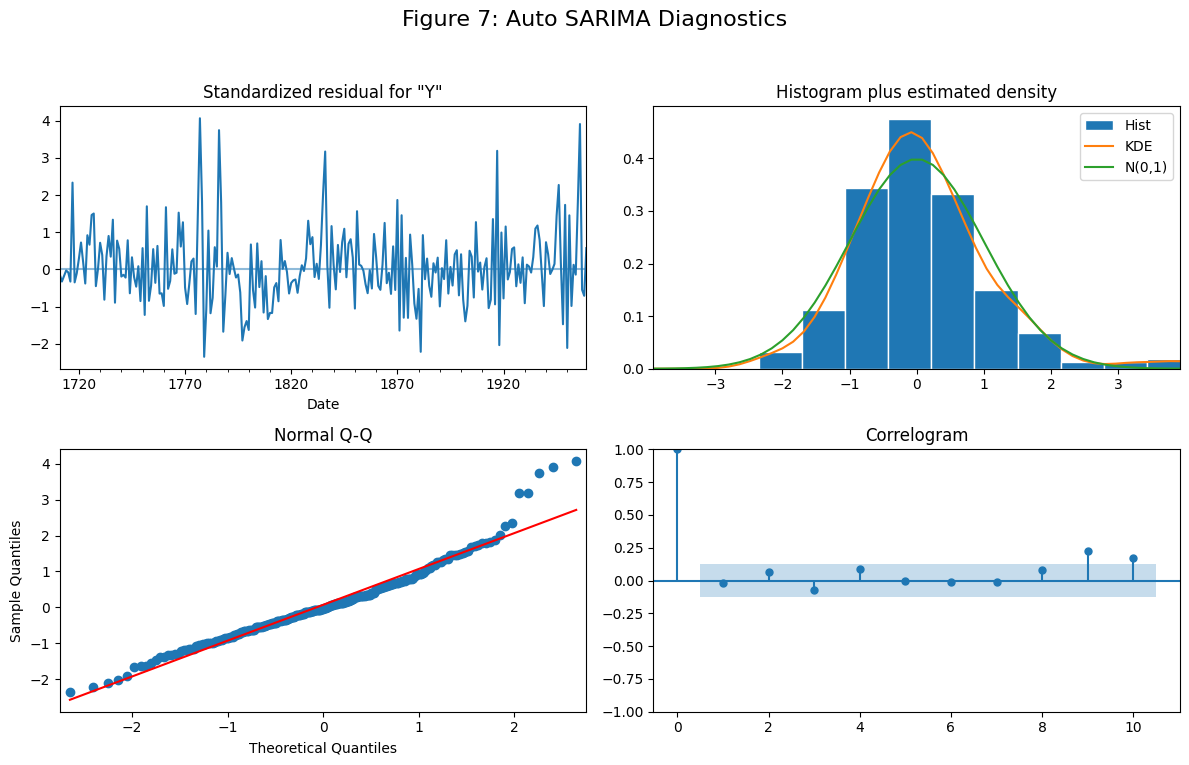

In [40]:
# Generate the diagnostics plot
fig = sarima_auto.plot_diagnostics(figsize=(12, 8))

# Add a title to the entire figure
fig.suptitle("Figure 7: Auto SARIMA Diagnostics", fontsize=16)

# Adjust layout to make room for the title
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()

SARIMA models assume that residuals are normally distributed. When this assumption is violated—such as through skewness or heavy tails—the resulting confidence intervals may misrepresent the true distribution of forecast errors. The Normal Q-Q plot shows that while residuals generally follow a normal distribution, deviations from the reference line at the upper end suggest potential kurtosis, as supported by the slight departure of the histogram from a normal curve. These deviations may also indicate the presence of outliers, which is further evidenced by the standardised residuals plot.

In the autocorrelation plot (correlogram), most residuals fall within the non-significant bounds (blue area), suggesting minimal autocorrelation. However, the presence of significant spikes at lags 9 and 10 implies that some structure remains unaccounted for by the SARIMA model. This is likely due to the approximate nature of the 11-year solar cycle, which may not align perfectly with the model’s seasonal assumptions.


# Comparison of Model Metrics

In [43]:
import pandas as pd

# Create a table with each row representing a model and its metrics
data = {
    'Model': ['Mean-based', 'Auto SARIMA'],
    'RMSE': [rmse_mean, rmse_sarima_auto],
    'MAE': [mae_mean, mae_sarima_auto],
    'AIC': ['N/A', aic_sarima_auto]
}

df = pd.DataFrame(data)
print(df)

         Model   RMSE    MAE      AIC
0   Mean-based  63.79  53.53      N/A
1  Auto SARIMA  59.62  46.61  2375.23


- **RMSE (Root Mean Squared Error):** The auto SARIMA model has a lower RMSE, indicating better overall predictive accuracy.
- **MAE (Mean Absolute Error):** The auto SARIMA performs better in terms of average error magnitude.
- **AIC (Akaike Information Criterion):** Not applicable for the mean-based model but included if a comparison was needed with a SARIMA model with manually selected parameters.

**Conclusion:** The auto SARIMA model performs better than the mean-based model, so it does have some predictive value.

# Forecasting Future Sunspot Activity (2025-2050) with Auto SARIMA

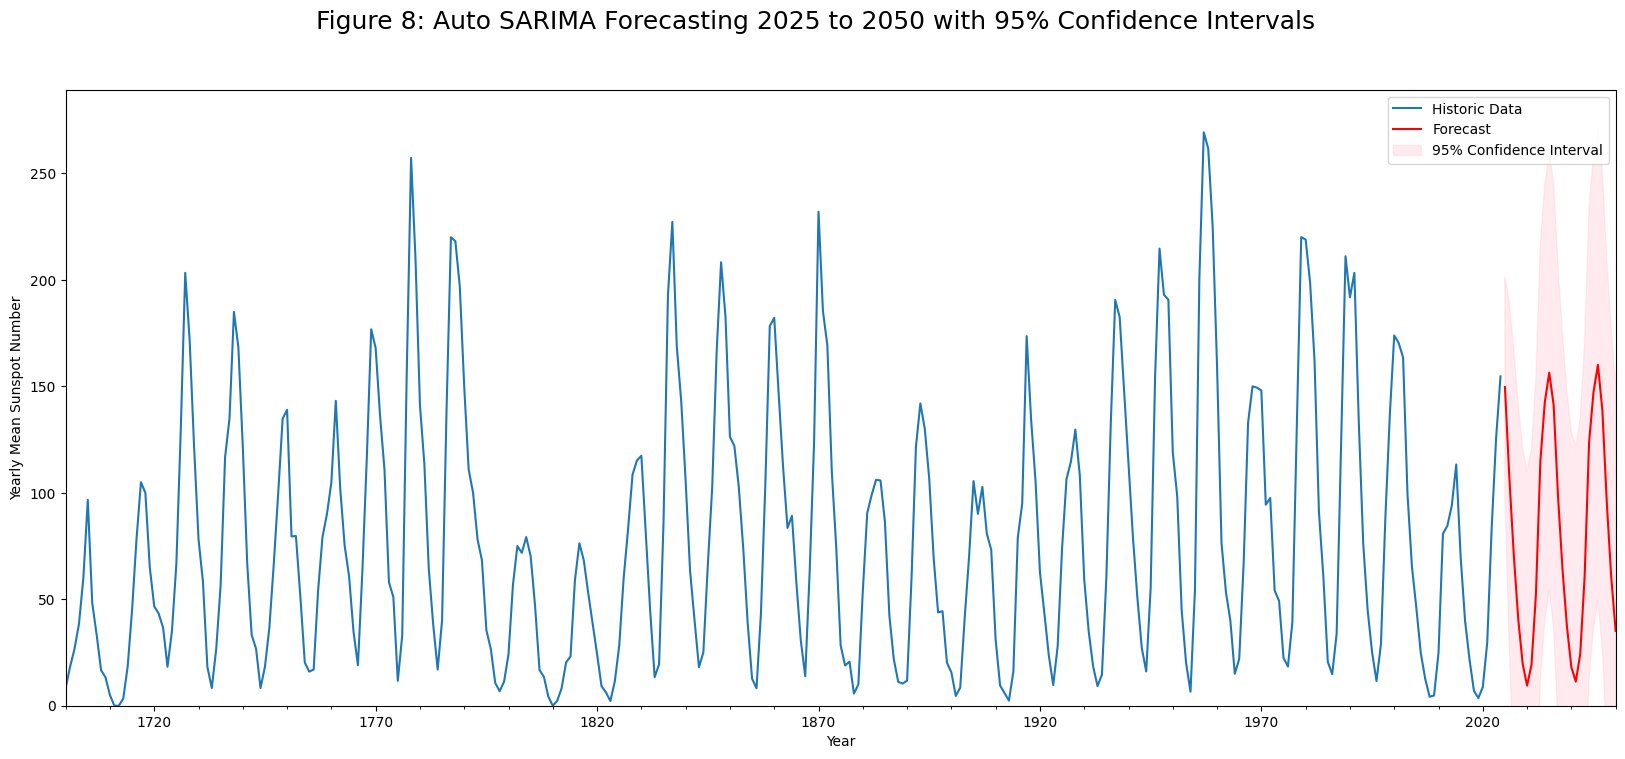

In [46]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the time series data is set to yearly frequency starting in January
YearlySSN = YearlySSN.asfreq('AS-JAN')

# Fit the SARIMA model
sarima_auto = SARIMAX(
    YearlySSN['YearlyMeanTotalSunspotNumber'], 
    order=(2, 0, 0), 
    seasonal_order=(5, 1, 0, 11)
).fit(maxiter=1000, disp=True)

# Get forecast object for 2025 to 2050
forecast_obj_auto = sarima_auto.get_forecast(steps=26)

# Extract predicted mean and confidence intervals
forecast_mean_auto = forecast_obj_auto.predicted_mean
conf_int_auto = forecast_obj_auto.conf_int(alpha=0.05)

# Create a figure and axis object with a specified size
fig, ax = plt.subplots(figsize=(20, 8))

# Plot historical data
YearlySSN['YearlyMeanTotalSunspotNumber'].plot(ax=ax, label='Historic Data')

# Plot forecasted values
forecast_mean_auto.plot(ax=ax, label='Forecast', color='red')

# Plot confidence intervals
ax.fill_between(
    forecast_mean_auto.index,
    conf_int_auto.iloc[:, 0],
    conf_int_auto.iloc[:, 1],
    color='pink',
    alpha=0.3,
    label='95% Confidence Interval'
)

# Force y-axis to start at zero
ax.set_ylim(bottom=0)


# Add labels and legend
plt.legend()
plt.suptitle("Figure 8: Auto SARIMA Forecasting 2025 to 2050 with 95% Confidence Intervals", fontsize=18)
plt.xlabel('Year')
plt.ylabel('Yearly Mean Sunspot Number')
plt.show()


The mean forecasts produced by the SARIMA model exhibit the expected seasonal pattern, consistent with the solar cycle. However, the associated confidence intervals are notably wide—occasionally encompassing zero during sunspot minimum years. This raises concerns about the model’s predictive reliability, as it is highly uncommon for a year to pass without any observed sunspots. Such wide intervals suggest substantial uncertainty in the forecasts, potentially limiting their practical interpretability.

## Write Historic Sunspot Data and Auto SARIMA Forecast to an Excel Workbook
For further analysis or visualisation in Excel or Tableau

In [49]:
import pandas as pd

# Step 1: Extract historical data
historical_df = YearlySSN.loc['1700':'2024'].reset_index()
historical_df['Year'] = historical_df.iloc[:, 0].dt.year
historical_df = historical_df[['Year', 'YearlyMeanTotalSunspotNumber']]
historical_df.columns = ['Year', 'SunspotNumber']

# Step 2: Extract forecast data
forecast_df = forecast_mean_auto.loc['2025':'2050'].reset_index()
forecast_df['Year'] = forecast_df.iloc[:, 0].dt.year
forecast_df['SunspotNumber'] = forecast_df.iloc[:, 1]
forecast_df = forecast_df[['Year', 'SunspotNumber']]

# Step 3: Combine both
combined_df = pd.concat([historical_df, forecast_df], ignore_index=True)

# Step 4: Round sunspot numbers to one decimal place
combined_df['SunspotNumber'] = combined_df['SunspotNumber'].round(1)

# Step 5: Export to Excel
combined_df.to_excel('Sunspot_History_and_Forecast_1700_2050.xlsx', index=False)
